In [ ]:
!pip install matplotlib numpy pandas seaborn scikit-learn ipython
!pip install kneed

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.1 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

In [ ]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/cd-files/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [ ]:
df['fecha_defuncion'].unique()

array([nan])

In [ ]:
list(df.columns)

['ID',
 'fec_not',
 'semana',
 'año',
 'edad_',
 'uni_med_',
 'sexo_',
 'cod_pais_o',
 'cod_dpto_o',
 'cod_mun_o',
 'area_',
 'ocupacion_',
 'tip_ss_',
 'cod_ase_',
 'gp_discapa',
 'gp_desplaz',
 'gp_migrant',
 'gp_carcela',
 'gp_gestan',
 'gp_calle',
 'gp_psiquia',
 'gp_vic_vio',
 'fecha_contagio',
 'inicio_sintomas',
 'pac_hos_',
 'fec_hos_',
 'condicion_final',
 'fecha_defuncion',
 'fecha_nacimiento',
 'certif_defuncion',
 'familiar_sintomas',
 'fiebre',
 'cefalea',
 'dolor_retroocular',
 'mialgias',
 'artralgia',
 'erupcion',
 'dolor_abdomen',
 'vomito',
 'diarrea',
 'somnolencia',
 'hipotension',
 'hepatomegalia',
 'hemorragia_mucosa',
 'hipotermia',
 'caida_plaquetas',
 'acum_liquido',
 'aum_hematocrito',
 'conducta',
 'latitud',
 'longitud']

In [ ]:
df.isnull().sum()

ID                      0
fec_not                 0
semana                  0
año                     0
edad_                   0
uni_med_                0
sexo_                   0
cod_pais_o              0
cod_dpto_o              0
cod_mun_o               0
area_                   0
ocupacion_              0
tip_ss_                 0
cod_ase_                9
gp_discapa              0
gp_desplaz              0
gp_migrant              0
gp_carcela              0
gp_gestan               0
gp_calle                0
gp_psiquia              0
gp_vic_vio              0
fecha_contagio          2
inicio_sintomas         2
pac_hos_                0
fec_hos_             1014
condicion_final         0
fecha_defuncion      1262
fecha_nacimiento        0
certif_defuncion     1262
familiar_sintomas       0
fiebre                  0
cefalea                 0
dolor_retroocular       0
mialgias                0
artralgia               0
erupcion                0
dolor_abdomen           0
vomito      

In [ ]:
listaPuntos = []
for i in range(df.shape[0]):
  listaPuntos.append((df['latitud'][i], df['longitud'][i]))

In [ ]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(listaPuntos)
scaled_features[:12]

array([[-0.15098307, -0.9022805 ],
       [ 0.17099084, -1.26525261],
       [ 1.16850635,  0.53719075],
       [-0.9435139 ,  0.54292234],
       [-0.99246873, -1.21271676],
       [-0.39522847,  0.81037541],
       [ 0.30516498,  0.76452642],
       [ 0.59528081,  1.16952646],
       [ 0.52561596, -0.87648958],
       [-0.94382236, -0.32916624],
       [ 1.25940988, -0.6825857 ],
       [-1.40843068,  0.64608226]])

In [ ]:
kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 300,
    'random_state': 42,
}

sse = []
for k in range(1,11):
  kmeans = KMeans(n_clusters = k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)

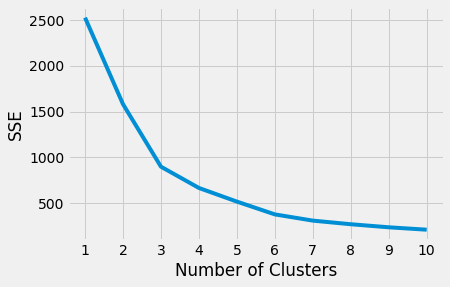

In [ ]:
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [ ]:
silhouette_coefficients = []

#Aquí se inicia con 2 cluester
for k in range(2, 11):
  kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
  kmeans.fit(scaled_features)
  score = silhouette_score(scaled_features, kmeans.labels_)
  silhouette_coefficients.append(score)

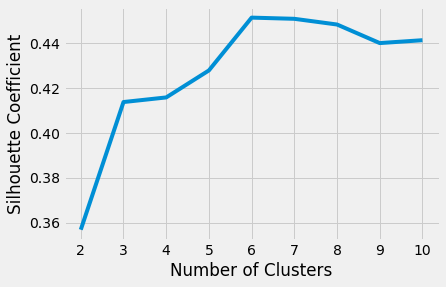

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [ ]:
kmeans = KMeans(
    init = 'random',
    n_clusters = 6,
    n_init = 10,
    max_iter = 300,
    random_state = 42
    )

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=6, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

377.7096763784671

In [ ]:
kmeans.cluster_centers_

array([[-1.02871867, -0.34707193],
       [-0.6735797 , -1.79176809],
       [ 0.48825514, -0.83597128],
       [ 1.23509744,  0.34335006],
       [-1.25710062,  1.35508446],
       [ 0.10623993,  0.87919347]])

In [ ]:
kmeans.n_iter_

13

In [ ]:
kmeans.labels_

array([2, 2, 3, ..., 2, 0, 4], dtype=int32)